In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.columns=['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'cabin', 'embark_town',
       'alive', 'alone']

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,cabin,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### After removing the duplicate columns we have the below dataset

In [5]:
titanic.drop(['who','adult_male','embark_town','alive','class'],axis=1,inplace=True)

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,C,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,C,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,True


In [7]:
df=titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,C,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,C,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,True


### checking for null values

In [8]:
features_na=[columns for columns in df.columns if df[columns].isnull().sum() >1 ]
features_na

['age', 'embarked', 'cabin']

In [9]:
for feature in features_na:
    count=np.round(df[feature].isnull().mean(),3)
    print(feature,'is having',count,'% of null values')

age is having 0.199 % of null values
embarked is having 0.002 % of null values
cabin is having 0.772 % of null values


## Feature Engineering

### Since the missing values in the age feature does n't occur at random we use the Enf of Distribution imputation to handle the null values.

In [10]:
extreme=df['age'].mean()+(df['age'].std())*3
extreme

73.27860964406095

In [11]:
df['age']=np.where(df['age'].isnull(),extreme,df['age'])

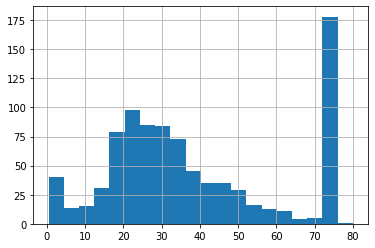

In [12]:
df['age'].hist(bins=20)

### As a result of the above imputation outliers can also be handled

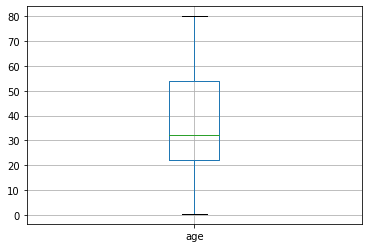

In [13]:
df.boxplot(column='age')

### Since Embarked  is a categorical feature and the % of missing values is very less we will replace the missing values with the most occuring item in that feature

In [14]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [15]:
df['embarked'].isnull().sum()

0

### Since Cabin is a categorical feature and the % of missing values is very high we will replace the missing values with the most occuring item in that feature and creating a new feature to indicate the missing value

In [16]:
df['cabin_null']=np.where(df['cabin'].isnull(),1,0)

In [17]:
df['cabin']=df['cabin'].fillna(df['cabin'].mode()[0])

In [18]:
df['cabin'].isnull().sum()

0

In [19]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin,alone,cabin_null
0,0,3,male,22.00000,1,0,7.2500,S,C,False,1
1,1,1,female,38.00000,1,0,71.2833,C,C,False,0
2,1,3,female,26.00000,0,0,7.9250,S,C,True,1
3,1,1,female,35.00000,1,0,53.1000,S,C,False,0
4,0,3,male,35.00000,0,0,8.0500,S,C,True,1
5,0,3,male,73.27861,0,0,8.4583,Q,C,True,1
6,0,1,male,54.00000,0,0,51.8625,S,E,True,0
7,0,3,male,2.00000,3,1,21.0750,S,C,False,1
8,1,3,female,27.00000,0,2,11.1333,S,C,False,1
9,1,2,female,14.00000,1,0,30.0708,C,C,False,1


### One hot encoding the Sex feature

In [20]:
key={'male':1,'female':0}
df['sex']=df['sex'].map(key)


In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin,alone,cabin_null
0,0,3,1,22.0,1,0,7.2500,S,C,False,1
1,1,1,0,38.0,1,0,71.2833,C,C,False,0
2,1,3,0,26.0,0,0,7.9250,S,C,True,1
3,1,1,0,35.0,1,0,53.1000,S,C,False,0
4,0,3,1,35.0,0,0,8.0500,S,C,True,1


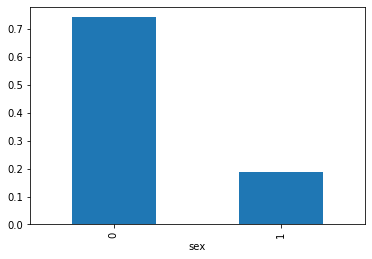

In [22]:
df.groupby('sex')['survived'].mean().plot(kind='bar')
#from the graph it is clearly evident that % of women survived is very much greater than % of men.

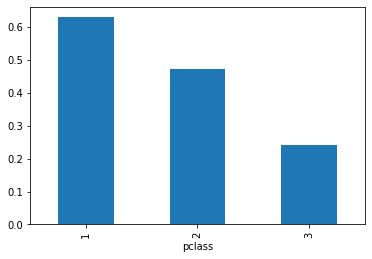

In [23]:
df.groupby('pclass')['survived'].mean().plot(kind='bar')
#We can see that the people in 1st class have highest survival percentage when compared to 2nd,3rd class.

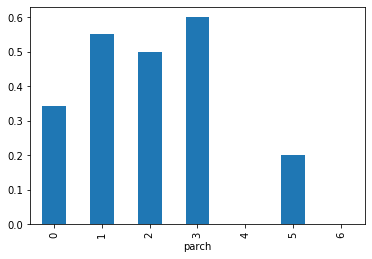

In [24]:
df.groupby('parch')['survived'].mean().plot(kind='bar')
#The below graph denotes the people who came with their parents and children and their survival percentage


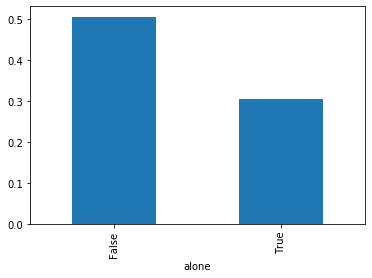

In [25]:
df.groupby('alone')['survived'].mean().plot(kind='bar')
#The persons who came alone is having low percentage of survival.

## Feature Selection 

### 1. Pearson co-efficient

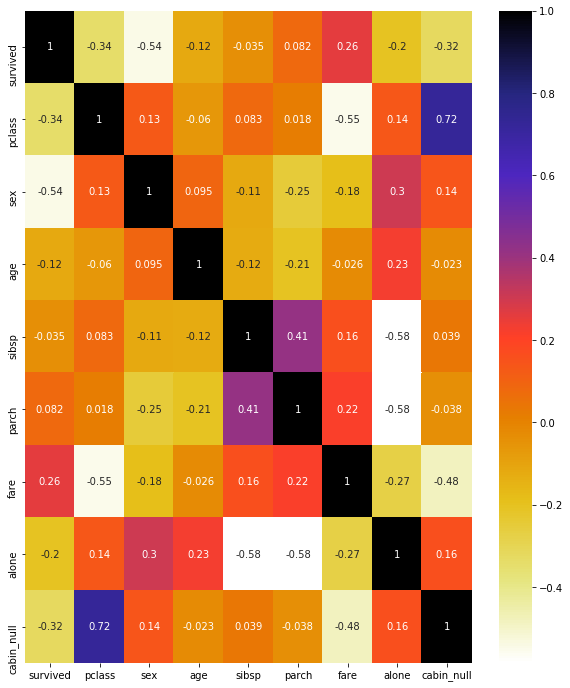

In [41]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [36]:
def remove_high_corr(df,threshold):
    result=[]
    corr_matrix=df.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                column=df.columns[i]
                result.append(column)
    return result
            

In [38]:
remove_high_corr(df,0.9)

[]

In [67]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'cabin', 'alone', 'cabin_null'],
      dtype='object')

### We are dropping the columns  'embarked', 'cabin', 'alone', 'cabin_null' since these features will not add any meaning to predicting whether a person has survived or not.

In [69]:
x=x.drop('survived',axis=1)

In [70]:
y=df['survived']

In [71]:
x.head()

,pclass,sex,age,sibsp,parch,fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [72]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  891 non-null    int64  
 1   sex     891 non-null    int64  
 2   age     891 non-null    float64
 3   sibsp   891 non-null    int64  
 4   parch   891 non-null    int64  
 5   fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


### 2.Information Gain

In [73]:
from sklearn.feature_selection import mutual_info_classif
feature=mutual_info_classif(x,y)

In [74]:
features=pd.Series(feature,index=x.columns)
features

pclass    0.070789
sex       0.147642
age       0.037607
sibsp     0.020007
parch     0.000000
fare      0.127992
dtype: float64

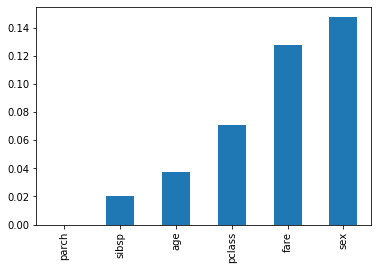

In [76]:
features.sort_values().plot(kind='bar')

### sex column has the highest information gain

In [77]:
from sklearn.model_selection import train_test_split

In [84]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
xscaled=scalar.fit_transform(x)

In [85]:
xtrain,xtest,ytrain,ytest=train_test_split(xscaled,y,test_size=0.25,random_state=0)

In [86]:
xtrain.shape

(668, 6)

In [87]:
xtest.shape

(223, 6)

In [88]:
ytrain.shape

(668,)

In [89]:
ytest.shape

(223,)

In [90]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=100)
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=100)

In [91]:
from sklearn.metrics import accuracy_score
pred=clf.predict(xtest)
accuracy_score(ytest,pred)

0.7757847533632287

[Text(277.219921875, 791.4176470588235, 'X[1] <= -0.309\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(134.4625, 743.4529411764706, 'X[0] <= 0.229\ngini = 0.372\nsamples = 231\nvalue = [57, 174]'),
 Text(52.7, 695.4882352941177, 'X[2] <= -1.652\ngini = 0.116\nsamples = 129\nvalue = [8, 121]'),
 Text(46.5, 647.5235294117647, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(58.9, 647.5235294117647, 'X[5] <= -0.067\ngini = 0.103\nsamples = 128\nvalue = [7, 121]'),
 Text(46.5, 599.5588235294117, 'X[5] <= -0.08\ngini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(40.300000000000004, 551.5941176470587, 'X[2] <= -0.062\ngini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(24.8, 503.6294117647059, 'X[2] <= -0.5\ngini = 0.102\nsamples = 37\nvalue = [2, 35]'),
 Text(18.6, 455.66470588235296, 'X[2] <= -0.684\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(12.4, 407.7, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(24.8, 407.7, 'X[4] <= 0.147\ngini = 0.408\nsamples = 7\nval

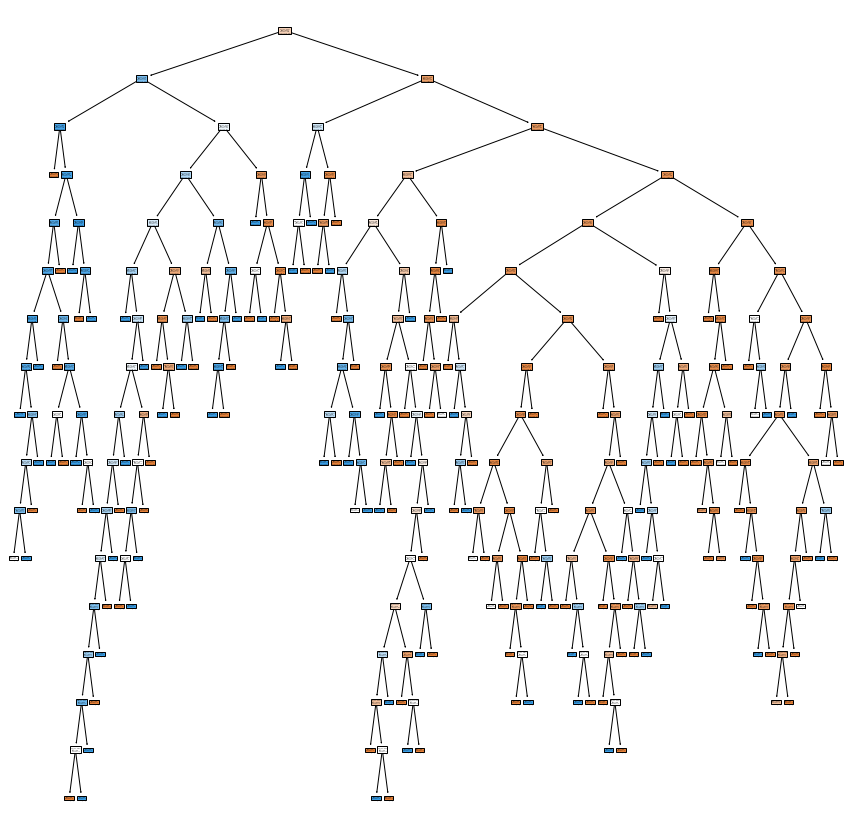

In [92]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)

### Post pruning

In [93]:
path=clf.cost_complexity_pruning_path(xtrain,ytrain)

In [94]:
ccp_alphas,impurity=path.ccp_alphas,path.impurities

In [95]:
ccp_alphas

array([0.        , 0.00016039, 0.00018234, 0.00023112, 0.0002495 ,
       0.00037425, 0.00037917, 0.00046336, 0.000499  , 0.00056138,
       0.00061241, 0.00066534, 0.0006986 , 0.00070692, 0.0007485 ,
       0.0007592 , 0.00085471, 0.000998  , 0.000998  , 0.000998  ,
       0.000998  , 0.00112275, 0.00112275, 0.00112275, 0.00114752,
       0.0011976 , 0.00128315, 0.00132236, 0.00133067, 0.00135443,
       0.00136685, 0.00138185, 0.00139376, 0.00140344, 0.00140895,
       0.00143943, 0.00145423, 0.00147705, 0.00150468, 0.00163466,
       0.00166361, 0.00171086, 0.00189356, 0.00199601, 0.00199601,
       0.00201134, 0.00207917, 0.00214344, 0.00214544, 0.00228293,
       0.0023362 , 0.00233948, 0.00247666, 0.00265476, 0.00268797,
       0.0027637 , 0.00290523, 0.00296166, 0.0030196 , 0.00330786,
       0.00335593, 0.00421679, 0.00849848, 0.00886477, 0.01233496,
       0.01499817, 0.02985151, 0.14240923])

In [96]:
clfs=[]
for alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=100,ccp_alpha=alpha)
    clf.fit(xtrain,ytrain)
    clfs.append(clf)

In [98]:
train_score=[clf.score(xtrain,ytrain) for clf in clfs]
test_score=[clf.score(xtest,ytest) for clf in clfs]

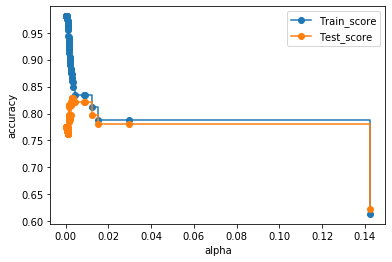

In [105]:
fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.plot(ccp_alphas,train_score,label='Train_score',drawStyle='steps-post',marker='o')
ax.plot(ccp_alphas,test_score,label='Test_score',drawStyle='steps-post',marker='o')
ax.legend()

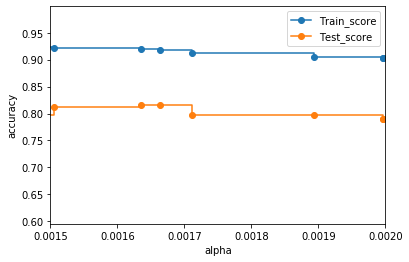

In [108]:
fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
plt.xlim(0.0015,0.002)
ax.plot(ccp_alphas,train_score,label='Train_score',drawStyle='steps-post',marker='o')
ax.plot(ccp_alphas,test_score,label='Test_score',drawStyle='steps-post',marker='o')
ax.legend()

In [109]:
for alpha in ccp_alphas:
    if alpha > 0.0016 and alpha < 0.0017:
        print(alpha)

0.0016346617110606376
0.001663607880393065


In [110]:
alpha=0.001663607880393065

In [111]:
clf=DecisionTreeClassifier(random_state=100,ccp_alpha=alpha)
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.001663607880393065, random_state=100)

In [112]:
pred=clf.predict(xtest)
accuracy_score(pred,ytest)

0.8161434977578476

[Text(320.85, 524.1857142857143, 'X[1] <= -0.309\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(197.16, 485.3571428571429, 'X[0] <= 0.229\ngini = 0.372\nsamples = 231\nvalue = [57, 174]'),
 Text(148.8, 446.52857142857147, 'X[2] <= -1.652\ngini = 0.116\nsamples = 129\nvalue = [8, 121]'),
 Text(133.92000000000002, 407.70000000000005, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(163.68, 407.70000000000005, 'gini = 0.103\nsamples = 128\nvalue = [7, 121]'),
 Text(245.52, 446.52857142857147, 'X[5] <= -0.178\ngini = 0.499\nsamples = 102\nvalue = [49, 53]'),
 Text(193.44, 407.70000000000005, 'X[2] <= 1.004\ngini = 0.469\nsamples = 80\nvalue = [30, 50]'),
 Text(133.92000000000002, 368.8714285714286, 'X[2] <= -0.5\ngini = 0.494\nsamples = 54\nvalue = [24, 30]'),
 Text(104.16000000000001, 330.0428571428572, 'X[5] <= -0.492\ngini = 0.459\nsamples = 42\nvalue = [15, 27]'),
 Text(89.28, 291.2142857142857, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(119.04, 291.2142857142857, 'X

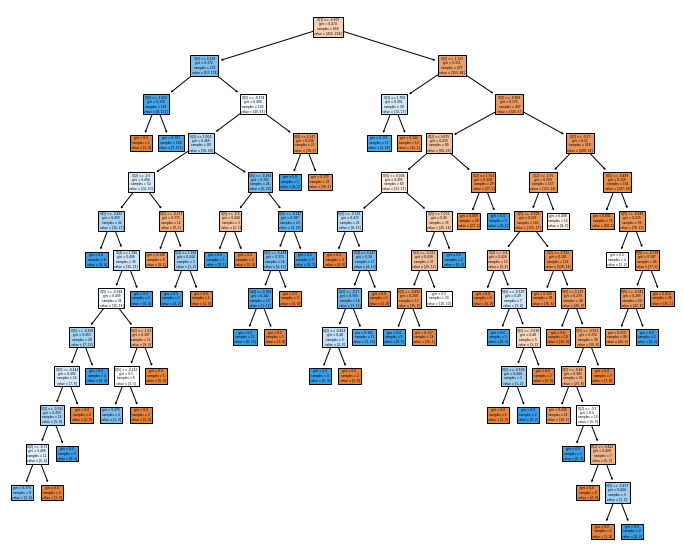

In [114]:
plt.figure(figsize=(12,10))
tree.plot_tree(clf,filled=True)

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

In [116]:
TP=confusion_matrix(ytest,pred)[0][0]
FP=confusion_matrix(ytest,pred)[0][1]
FN=confusion_matrix(ytest,pred)[1][0]
TN=confusion_matrix(ytest,pred)[1][1]

In [117]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
Accuracy

0.8161434977578476

In [118]:
Precision=(TP)/(TP+FP)
Precision

0.9064748201438849

In [119]:
Recall=(TP)/(TP+FN)
Recall

0.8181818181818182

In [120]:
auc=roc_auc_score(ytest,pred)

In [121]:
auc

0.7865707434052758

In [122]:
fpr,tpr,threshold=roc_curve(ytest,pred)

Text(0, 0.5, 'TPR')

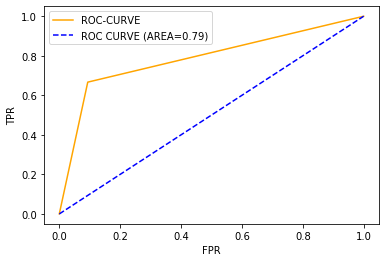

In [135]:
fig,ax=plt.subplots()
plt.plot(fpr,tpr,color='orange',label='ROC-CURVE')
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROC CURVE (AREA=%.2f)'% auc)
plt.legend()
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')